In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import ttest_rel

In [44]:
data = pd.read_csv('/home/paige/Documents/vocal_ambiguity/validation/c+w/chinese/data_exp_203181-v2/trials.csv')

In [45]:
demographics = pd.read_csv('/home/paige/Documents/vocal_ambiguity/validation/c+w/chinese/data_exp_203181-v2/demographics.csv')

In [46]:
# Reshape the DataFrame
df_reshaped = demographics.pivot(index='Participant', columns='Question', values='Response')

# Reset the index (optional, to make the ID a column again)
df_reshaped = df_reshaped.reset_index()

In [444]:
df_reshaped

Question,Participant,Age,First Language,Most commonly used language day to day,Rank your english language proficiency,Sex
0,12174060,55,english,english and French,5,Female
1,12174077,51,english,english,4,Male
2,12174099,NaN,french,english,3,Female
3,12174100,19,english,english,5,Male
4,12174105,40,english,english,5,Female
5,12174136,30,english,english,5,Male
6,12174140,31,english,english,5,Female
7,12174175,33,english,english,5,Male
8,12174227,59,english,english,5,Male
9,12174537,20,english,english,5,Female


In [47]:
merged_df = pd.merge(df_reshaped, data, on='Participant', how='inner')

In [37]:
french_data = merged_df[merged_df["First Language"] == 'french']

In [38]:
english_data = merged_df[merged_df["First Language"] == 'english']

In [48]:
mandarin_data = merged_df[merged_df["First Language"] == 'mandarin']

In [36]:
french_data

,Participant,Age,First Language,Most commonly used language day to day,Rank your english language proficiency,Sex,Response,filename,question,trial
0,12088700,29,french,french,5,Female,1,1.3-1-peel.wav,response,3
1,12088700,29,french,french,5,Female,6,1.3-1-peel.wav,slide,3
2,12088700,29,french,french,5,Female,0,0.77-1-full.wav,response,3
3,12088700,29,french,french,5,Female,7,0.77-1-full.wav,slide,3
4,12088700,29,french,french,5,Female,0,0.9-1-peel.wav,response,3
...,...,...,...,...,...,...,...,...,...,...
19355,12092269,49,french,french,5,Male,7,1.2-1-peel.wav,slide,5
19356,12092269,49,french,french,5,Male,0,1.1-1-full.wav,response,5
19357,12092269,49,french,french,5,Male,6,1.1-1-full.wav,slide,5
19358,12092269,49,french,french,5,Male,1,1-1-fool.wav,response,5


In [389]:
len(french_data['Participant'].unique())

10

In [32]:
len(english_data['Participant'].unique())

23

In [49]:
len(mandarin_data['Participant'].unique())

10

In [29]:
# Initialize a list to store the filtered rows
filtered_rows = []
filtered_indices = []

# Keep track of the last valid value
last_valid = None

# Iterate through the rows
for index, value in data['Tag'].items():
    if pd.isna(value):
        # Add the index if the last valid value is not NaN
        if last_valid != 'NaN':
            filtered_indices.append(index)
            last_valid = 'NaN'
    elif value == 'slide':
        # Add the index if the last valid value is not 'slide'
        if last_valid != 'slide':
            filtered_indices.append(index)
            last_valid = 'slide'

# Filter the DataFrame to keep only the desired rows
filtered_df = data.loc[filtered_indices].reset_index(drop=True)

print(filtered_df)

     Participant Private ID  Response    Tag Spreadsheet: audio
0                  12228956         1    NaN  1.1-0.83-peel.wav
1                  12228956         7  slide  1.1-0.83-peel.wav
2                  12228956         1    NaN  1.3-0.63-full.wav
3                  12228956         4  slide  1.3-0.63-full.wav
4                  12228956         1    NaN   0.9-1.2-pill.wav
..                      ...       ...    ...                ...
699                12228924        10  slide   1.5-0.5-full.wav
700                12228924         0    NaN  1.4-0.55-fool.wav
701                12228924        10  slide  1.4-0.55-fool.wav
702                12228924         0    NaN  1.3-0.63-full.wav
703                12228924        10  slide  1.3-0.63-full.wav

[704 rows x 4 columns]


In [30]:
filtered_df.to_csv('/home/paige/Documents/vocal_ambiguity/validation/c+w/chinese/data_exp_203181-v2/data_exp_203181-v2_task-l5v2.csv', index=False)

FRENCH DATA

In [50]:
# Split into separate DataFrames based on keywords
mandarin_pill_df = mandarin_data[mandarin_data['filename'].str.contains('pill')]
mandarin_pill_response = mandarin_pill_df[mandarin_pill_df['question'] == 'response']
mandarin_pill_naturalness = mandarin_pill_df[mandarin_pill_df['question'] == 'slide']
mandarin_peel_df = mandarin_data[mandarin_data['filename'].str.contains('peel')]
mandarin_peel_response = mandarin_peel_df[mandarin_peel_df['question'] == 'response']
mandarin_peel_naturalness = mandarin_peel_df[mandarin_peel_df['question'] == 'slide']
mandarin_full_df = mandarin_data[mandarin_data['filename'].str.contains('full')]
mandarin_full_response = mandarin_full_df[mandarin_full_df['question'] == 'response']
mandarin_full_naturalness = mandarin_full_df[mandarin_full_df['question'] == 'slide']
mandarin_fool_df = mandarin_data[mandarin_data['filename'].str.contains('fool')]
mandarin_fool_response = mandarin_fool_df[mandarin_fool_df['question'] == 'response']
mandarin_fool_naturalness = mandarin_fool_df[mandarin_fool_df['question'] == 'slide']

In [390]:
# Split into separate DataFrames based on keywords
french_pill_df = french_data[french_data['filename'].str.contains('pill')]
french_pill_response = french_pill_df[french_pill_df['question'] == 'response']
french_pill_naturalness = french_pill_df[french_pill_df['question'] == 'slide']
french_peel_df = french_data[french_data['filename'].str.contains('peel')]
french_peel_response = french_peel_df[french_peel_df['question'] == 'response']
french_peel_naturalness = french_peel_df[french_peel_df['question'] == 'slide']
french_full_df = french_data[french_data['filename'].str.contains('full')]
french_full_response = french_full_df[french_full_df['question'] == 'response']
french_full_naturalness = french_full_df[french_full_df['question'] == 'slide']
french_fool_df = french_data[french_data['filename'].str.contains('fool')]
french_fool_response = french_fool_df[french_fool_df['question'] == 'response']
french_fool_naturalness = french_fool_df[french_fool_df['question'] == 'slide']

In [51]:
def weibull(x, lam, beta):
    return 1 - np.exp(- (x / lam)**beta)


In [52]:
def weibull_lapse(x, lam, beta, y0=0.0, ymax=0.8):
    return y0 + (ymax - y0) * (1 - np.exp(- (x / lam)**beta))

In [53]:
def proportion_correct(df, word, L1):
    if word in ['pill', 'full']:
        correct = 0
    else:
        correct = 1

    # Aggregate data: calculate the mean and standard deviation of the correct proportion
    result = (
        df.groupby('filename')
        .agg(
            total_count=('filename', 'size'),  # Total number of rows for each file name
            count_response_0=('Response', lambda x: (x == correct).sum())  # Count where response is correct
        )
        .assign(
            correct=lambda x: x['count_response_0'] / x['total_count'],  # Proportion of correct responses
            correct_std=lambda x: np.sqrt(x['correct'] * (1 - x['correct']) / x['total_count'])  # Correct std dev
        )
        .reset_index()
    )

    result['numeric_part'] = result['filename'].str.split('-').str[0].astype(float)
    result = result.sort_values('numeric_part')

    # Fit the Weibull function with both guess and lapse rates
    popt, _ = curve_fit(
        lambda x, lam, beta: weibull(x, lam, beta),  # Weibull function
        result['numeric_part'],  # Independent variable
        result['correct'],  # Dependent variable
        p0=[1, 2],  # Initial guesses for lambda and beta
        maxfev=100000  # Increase the number of function evaluations
    )
    
    # Generate smooth curve data for the Weibull fit
    x_fit = np.linspace(0.67, 1.5, 100)  # Adjust range as needed
    y_fit = weibull(x_fit, *popt)

    # Plot the observed data with error bars
    plt.figure(figsize=(10, 6))
    plt.scatter(result['numeric_part'], result['correct'], color='blue', label='Observed Data')
    plt.errorbar(
        result['numeric_part'], 
        result['correct'], 
        yerr=result['correct_std'],  # Error bars using corrected standard deviation
        fmt='o', 
        color='blue', 
        ecolor='black', 
        capsize=5,  # Add caps to the error bars
        label='Standard Deviation'
    )

    # Plot the Weibull fit curve
    plt.plot(x_fit, y_fit, color='red', label='Weibull Fit')
    
    # Customize the plot
    plt.ylim(0, 1)
    plt.xlabel('Stimulus Intensity')
    plt.ylabel('Response Probability')
    plt.title(f'Psychometric Curve (Weibull Function) {L1} L1 for {word}')
    plt.legend()
    plt.grid()
    plt.show()

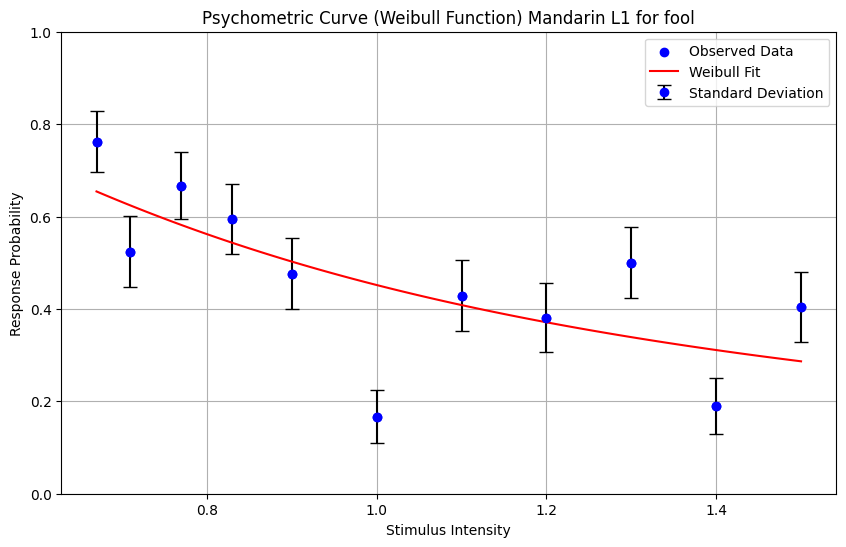

In [57]:
proportion_correct(mandarin_fool_response, 'fool', "Mandarin")

In [37]:

def proportion_correct_participant(df, word, L1):
    if word in ['pill', 'full']:
        correct = 0
    else:
        correct = 1

    # Aggregate data: Sum responses for each stimulus intensity per participant
    result = (
        df.groupby(['filename', 'Participant'])  # Group by participant and stimulus intensity (filename)
        .agg(
            total_count=('filename', 'size'),  # Total responses for each participant at each intensity level
            count_response_0=('Response', lambda x: (x == correct).sum())  # Count correct responses (0)
        )
        .assign(correct=lambda x: (x['count_response_0'] / x['total_count']))  # Proportion correct
        .reset_index()
    )

    # Extract numeric part of filename (e.g., stimulus intensity)
    result['numeric_part'] = result['filename'].str.split('-').str[0].astype(float)

    # Prepare to store data for t-test and slope test
    probabilities_067 = []
    probabilities_15 = []
    slopes = []

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Get unique participants and create a colormap
    unique_participants = result['Participant'].unique()
    colormap = plt.cm.get_cmap('viridis', len(unique_participants))

    for i, participant in enumerate(unique_participants):
        # Subset data for the current participant
        participant_data = result[result['Participant'] == participant]

        # Ensure that both x (stimulus intensity) and y (correct proportion) are 1D arrays
        xdata = participant_data['numeric_part'].values
        ydata = participant_data['correct'].values

        # Assign a unique color
        color = colormap(i)

        # Fit the Weibull function to the participant's data
        if len(xdata) > 1 and len(ydata) > 1:  # Ensure at least two data points to fit
            popt, _ = curve_fit(
                weibull,  # Weibull function to fit
                xdata,    # Independent variable (stimulus intensity)
                ydata,    # Dependent variable (correct response proportion)
                p0=[1, 2],  # Initial guesses for lambda and beta
                maxfev=1000000  # Increase the number of function evaluations
            )

            # Extract slope (beta)
            slopes.append(popt[1])

            # Generate smooth x values for plotting the fit
            x_fit = np.linspace(0.67, 1.5, 100)  # Adjust x range if necessary
            y_fit = weibull(x_fit, *popt)

            # Store probabilities for 0.67 and 1.5
            probabilities_067.append(weibull(0.99, *popt))
            probabilities_15.append(weibull(1.01, *popt))

            # Plot the participant's data and the Weibull fit curve
            plt.plot(x_fit, y_fit, label=f'Participant {int(participant)}', color=color)

            # Add scatter plot of original data points
            #plt.scatter(xdata, ydata, color=color, alpha=0.7, edgecolor='black', zorder=5)

    # Perform paired t-test
    t_stat, p_value = ttest_rel(probabilities_067, probabilities_15)
    print(f"Paired t-test results: t={t_stat:.5f}, p={p_value:.5f}")

    # Test if slopes are significantly greater than 0
    slopes = np.array(slopes)
    t_slope, p_slope = ttest_rel(slopes, np.zeros_like(slopes))
    print(f"Slope test results (greater than 0): t={t_slope:.5f}, p={p_slope/2:.5f} (one-tailed)")

    # Customize plot appearance
    plt.ylim(-0.1, 1.1)
    plt.xlabel('Stimulus Intensity')
    plt.ylabel('Response Probability')
    plt.title(f'Psychometric Curves ({L1} L1 for {word})')

    # Move the legend outside the plot area to the right
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), title="Participants")

    # Add grid and display the plot
    plt.grid()
    plt.tight_layout()  # Prevent clipping of the legend
    plt.show()

In [44]:
def proportion_correct_participant_2(df, word, L1):
    if word in ['pill', 'full']:
        correct = 0
    else:
        correct = 1

    # Aggregate data: calculate the mean and standard deviation of the correct proportion
    result = (
        df.groupby(['filename', 'Participant'])
        .agg(
            total_count=('filename', 'size'),  # Total number of rows for each file name and participant
            count_response_0=('Response', lambda x: (x == correct).sum())  # Count where response is correct
        )
        .assign(
            correct=lambda x: x['count_response_0'] / x['total_count'],  # Proportion of correct responses
            correct_std=lambda x: np.sqrt(x['correct'] * (1 - x['correct']) / x['total_count'])  # Correct std dev
        )
        .reset_index()
    )

    result['numeric_part'] = result['filename'].str.split('-').str[0].astype(float)
    result = result.sort_values(['Participant', 'numeric_part'])

    unique_participants = result['Participant'].unique()

    for participant in unique_participants:
        # Filter data for the current participant
        participant_data = result[result['Participant'] == participant]

        # Fit the Weibull function for the participant
        if len(participant_data) > 1:  # Ensure enough data points to fit
            popt, _ = curve_fit(
                lambda x, lam, beta: weibull(x, lam, beta),  # Weibull function
                participant_data['numeric_part'],  # Independent variable
                participant_data['correct'],  # Dependent variable
                p0=[1, 2],  # Initial guesses for lambda and beta
                maxfev=1000000  # Increase the number of function evaluations
            )
            
            # Generate smooth curve data for the Weibull fit
            x_fit = np.linspace(0.67, 1.5, 100)  # Adjust range as needed
            y_fit = weibull(x_fit, *popt)

            # Create the plot for this participant
            plt.figure(figsize=(8, 6))
            plt.scatter(participant_data['numeric_part'], participant_data['correct'], color='blue', label='Observed Data')
            plt.errorbar(
                participant_data['numeric_part'],
                participant_data['correct'],
                yerr=participant_data['correct_std'],  # Error bars using corrected standard deviation
                fmt='o',
                color='blue',
                ecolor='black',
                capsize=5,  # Add caps to the error bars
                label='Standard Deviation'
            )
            plt.plot(x_fit, y_fit, color='red', label='Weibull Fit')

            # Customize the plot
            plt.ylim(0, 1)
            plt.xlabel('Stimulus Intensity')
            plt.ylabel('Response Probability')
            plt.title(f'Participant {int(participant)}: Psychometric Curve ({L1} L1 for {word})')
            plt.legend()
            plt.grid()
            plt.show()

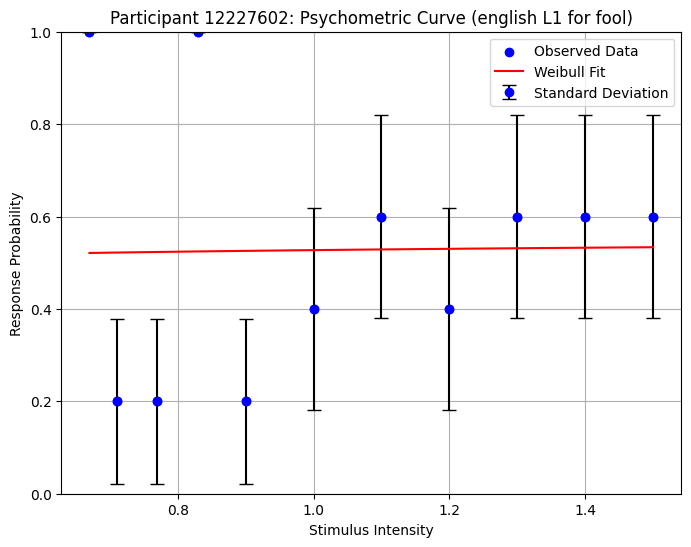

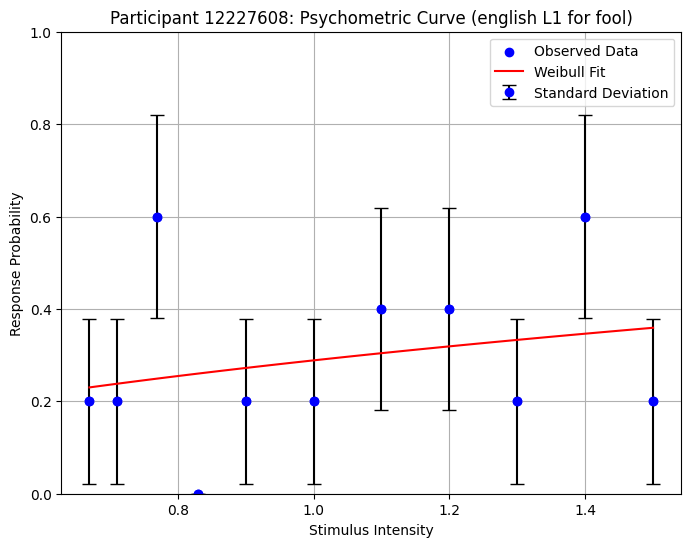

/home/paige/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:493: RuntimeWarning: overflow encountered in matmul
  cov_x = invR @ invR.T


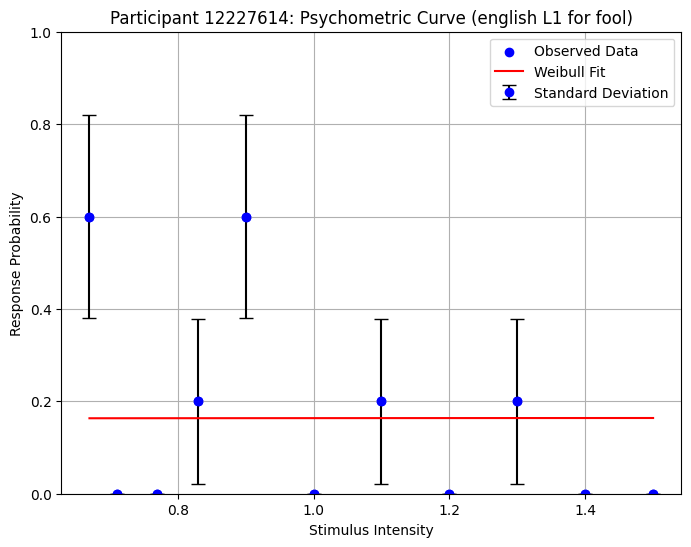

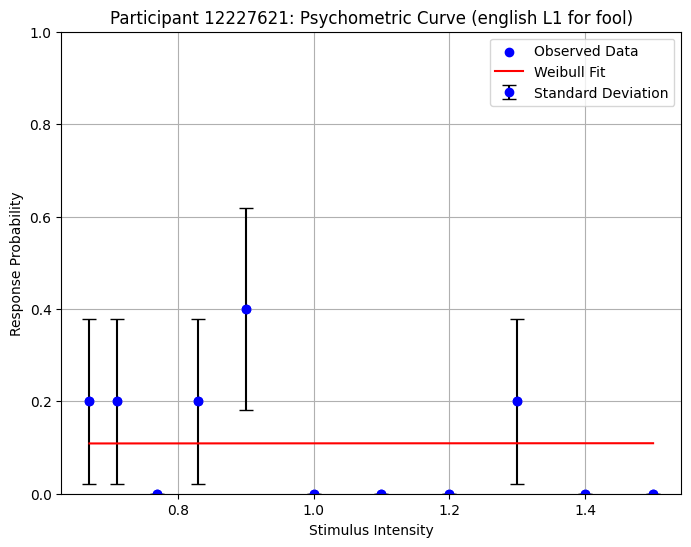

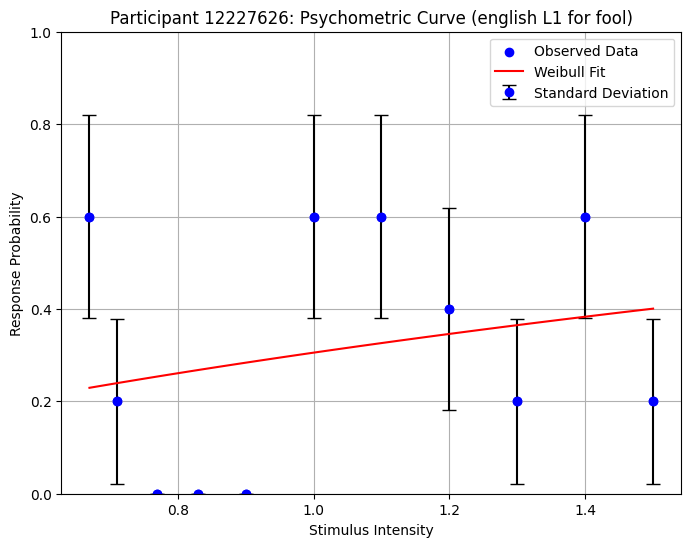

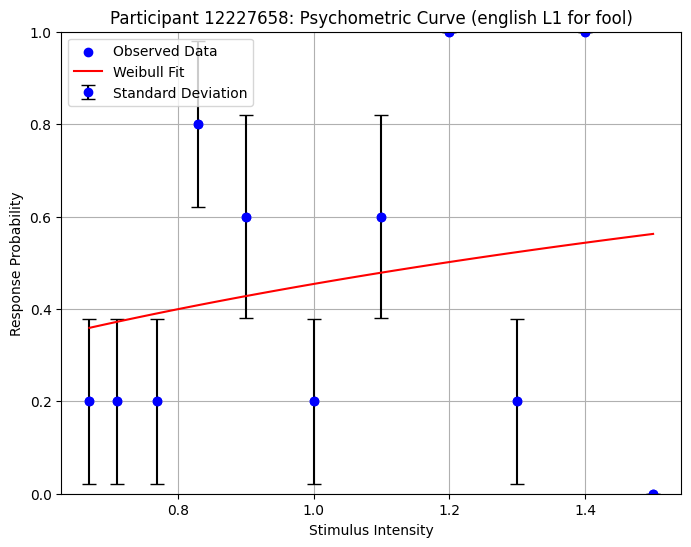

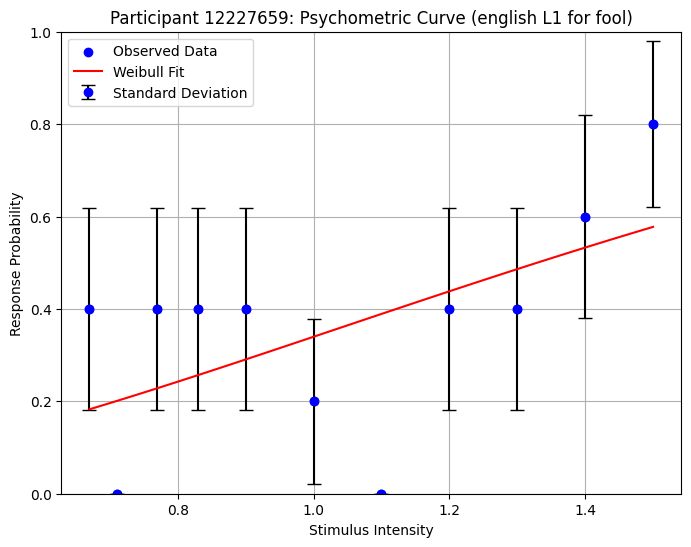

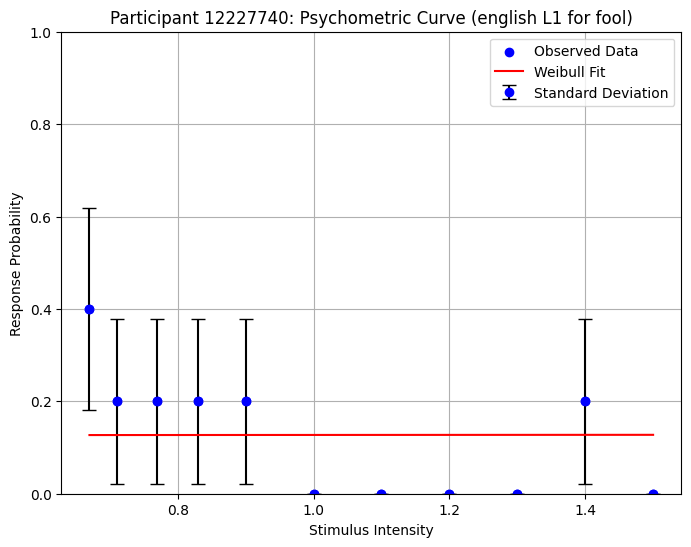

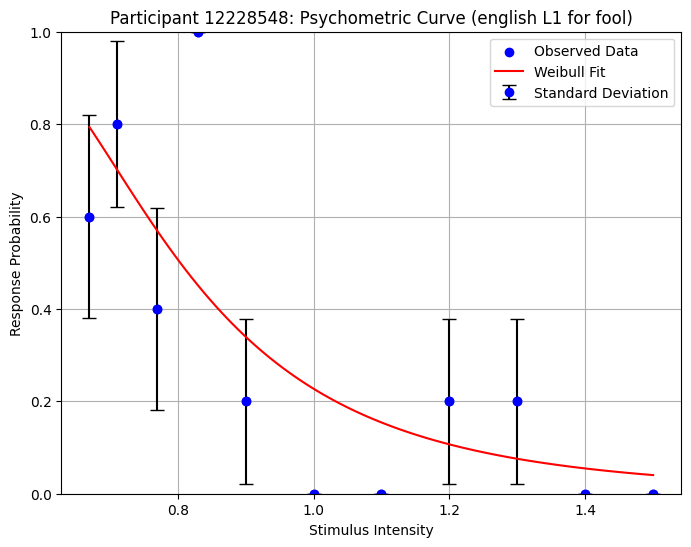

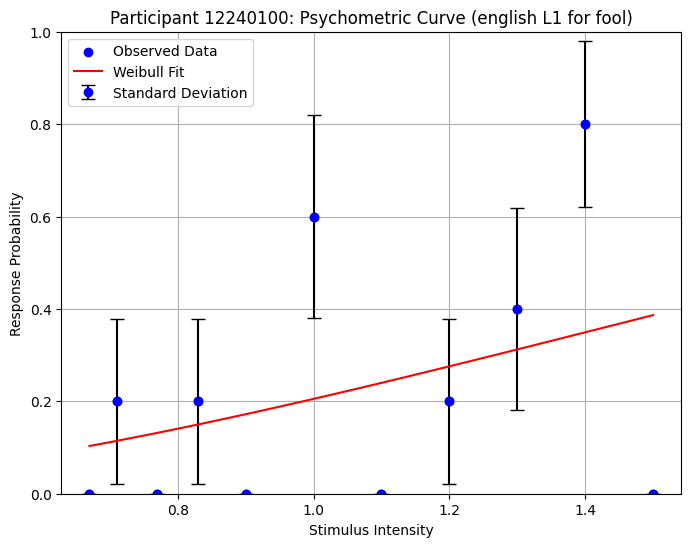

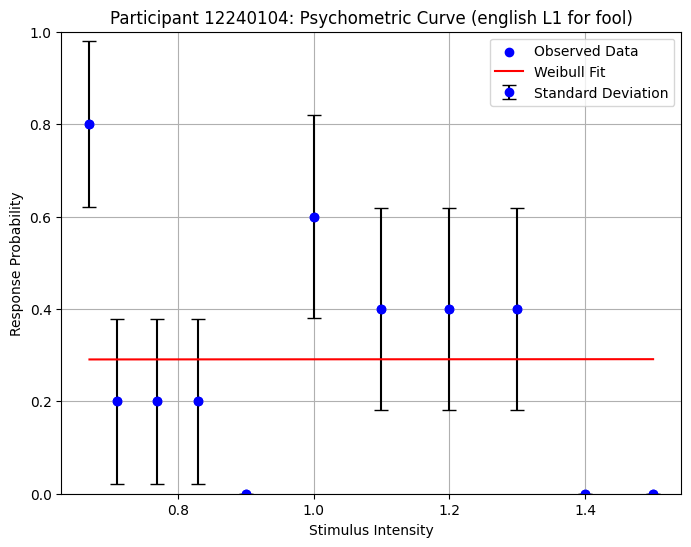

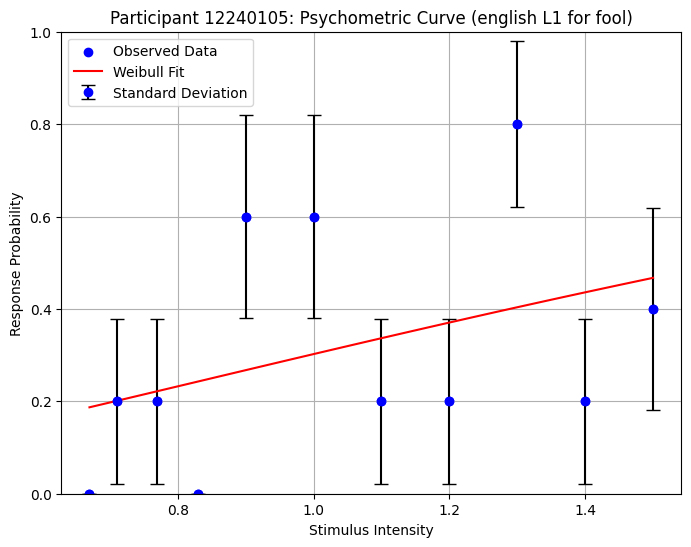

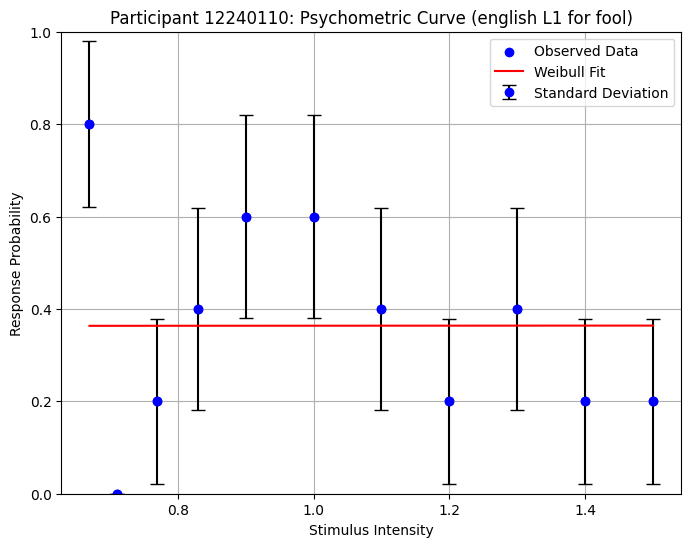

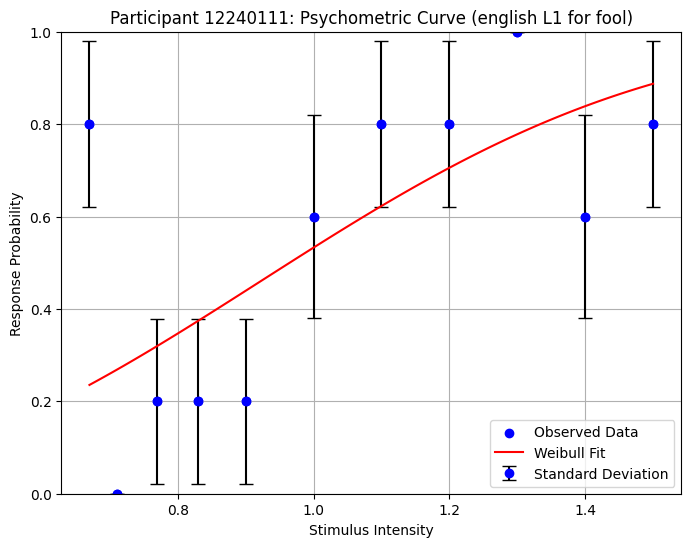

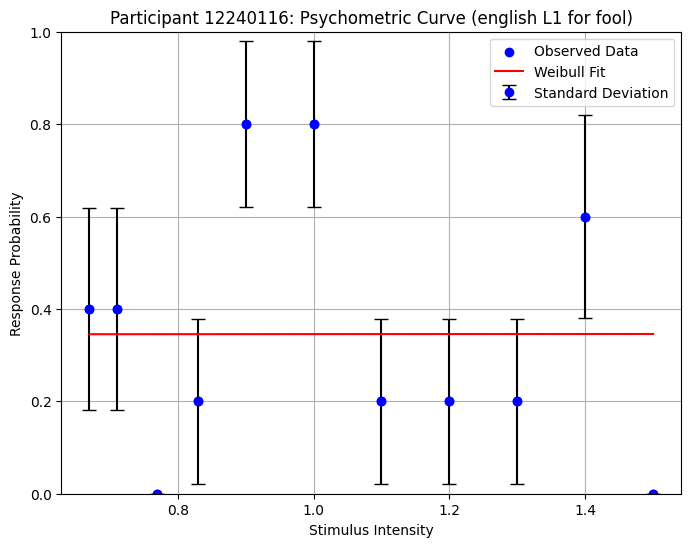

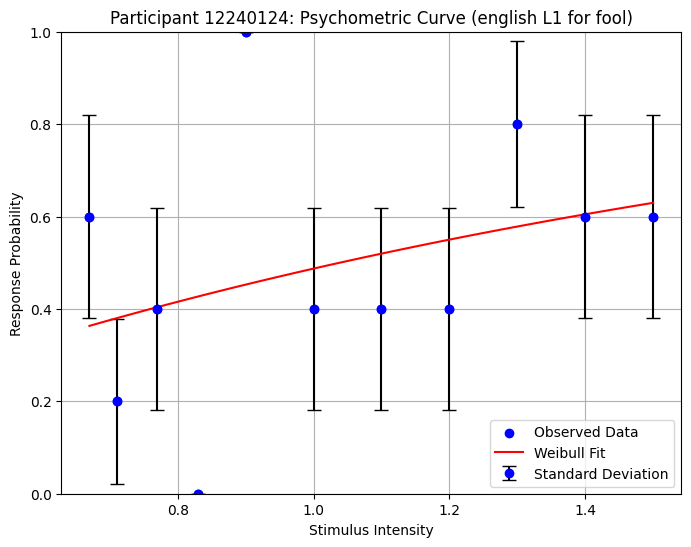

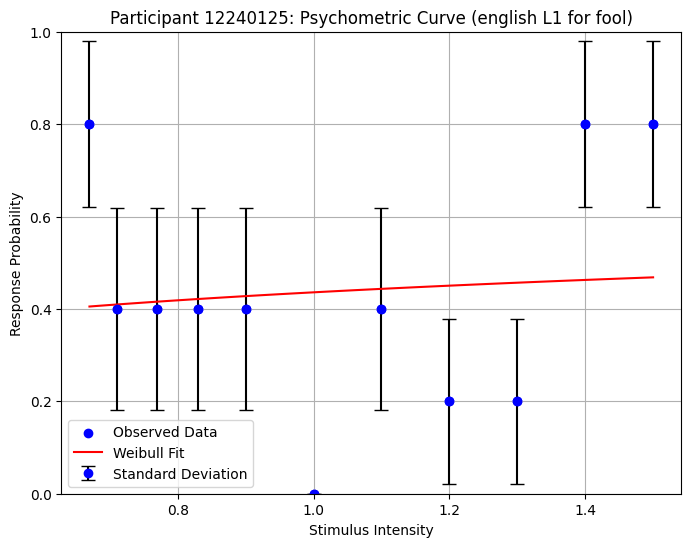

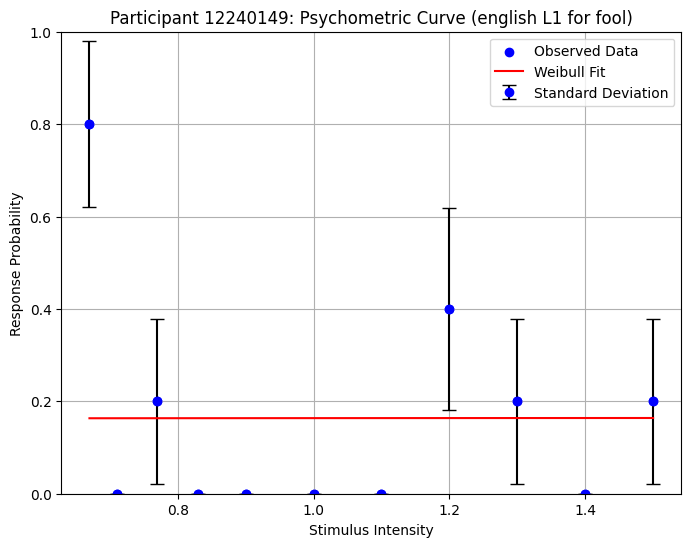

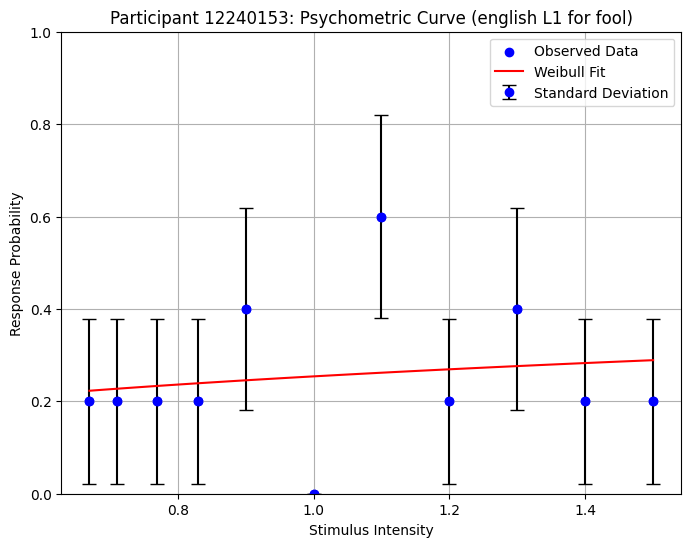

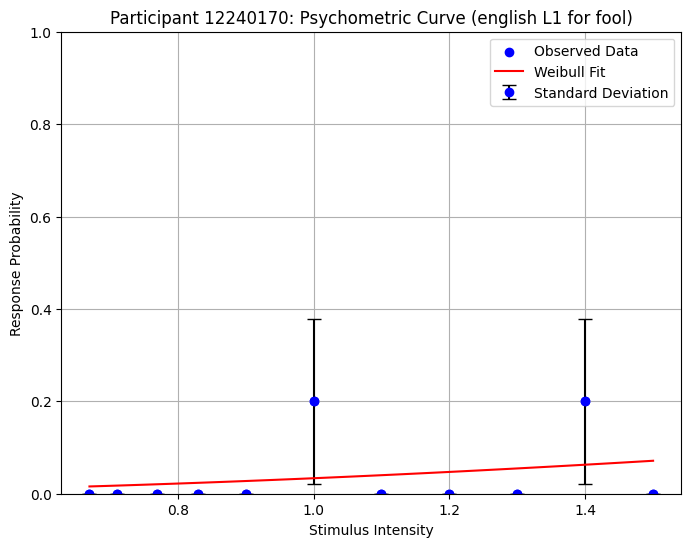

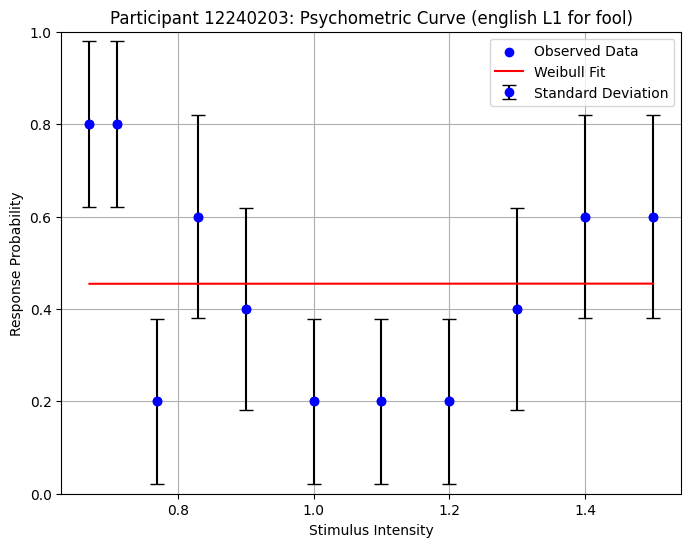

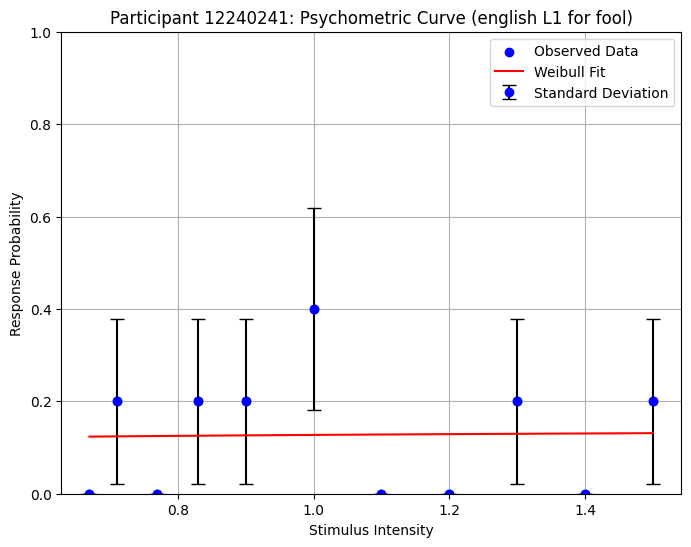

In [66]:
proportion_correct_participant_2(english_fool_response, 'fool', "english")

/tmp/ipykernel_592297/898713881.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis', len(unique_participants))
/home/paige/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:493: RuntimeWarning: overflow encountered in matmul
  cov_x = invR @ invR.T


Paired t-test results: t=-1.61224, p=0.12184
Slope test results (greater than 0): t=1.42089, p=0.08501 (one-tailed)


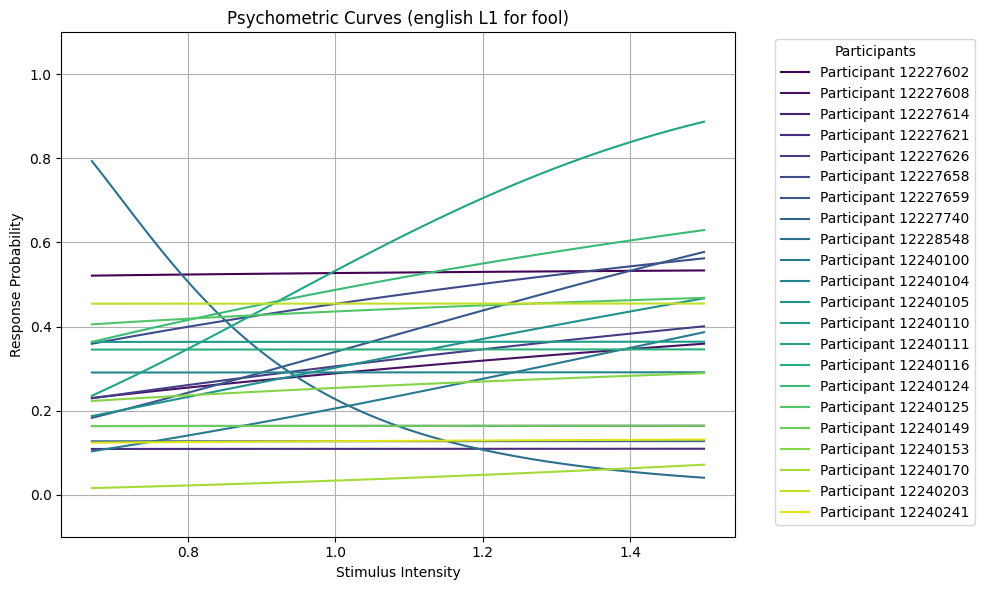

In [65]:
proportion_correct_participant(english_fool_response, 'fool', "english")

In [ ]:
proportion_correct_participant_2(french_fool_response, 'fool', "french")

In [40]:
def average_naturalness(df, word, L1):
    # Calculate the average response and standard deviation for each filename
    avg_response_df = (
        df.groupby('filename', as_index=False)
        .agg(
            average_response=('Response', 'mean'),  # Mean of responses
            response_std=('Response', 'std')       # Standard deviation of responses
        )
    )

    # Extract the numeric part of the filename for context multiplier
    avg_response_df['numeric_part'] = avg_response_df['filename'].str.split('-').str[1].astype(float)

    # Sort the dataframe by the numeric part
    avg_response_df = avg_response_df.sort_values('numeric_part')

    # Plot the data with error bars and a line
    plt.figure(figsize=(10, 6))

    # Line connecting the points
    plt.plot(
        avg_response_df['numeric_part'],
        avg_response_df['average_response'],
        marker='o',
        color='blue',
        label='Mean Response',
        linestyle='-'
    )

    # Error bars
    plt.errorbar(
        x=avg_response_df['numeric_part'],
        y=avg_response_df['average_response'],
        yerr=avg_response_df['response_std'],  # Add standard deviation as error bars
        fmt='o',  # Marker for the points
        ecolor='black',  # Error bar color
        capsize=5,  # Add caps to the error bars
        linestyle='none'  # No connecting line for error bars
    )

    # Customize plot labels and title
    plt.ylim(0, 10)
    plt.xlabel('Context Multiplier')
    plt.ylabel('Average Naturalness')
    plt.title(f'Average Naturalness Response for {word} ({L1})')
    plt.grid(True)
    plt.legend()
    plt.show()

In [35]:
from scipy.stats import ttest_ind

def average_naturalness_ttest(df, word, L1):
    # Calculate the average response and standard deviation for each filename
    avg_response_df = (
        df.groupby('filename', as_index=False)
        .agg(
            average_response=('Response', 'mean'),  # Mean of responses
            response_std=('Response', 'std')       # Standard deviation of responses
        )
    )

    # Extract the numeric part of the filename for context multiplier
    avg_response_df['numeric_part'] = avg_response_df['filename'].str.split('-').str[1].astype(float)

    # Sort the dataframe by the numeric part
    avg_response_df = avg_response_df.sort_values('numeric_part')

    # Identify the raw responses for the reference group (numeric_part == 1)
    reference_responses = df[df['filename'].str.contains(r'^1-')]['Response']
    if reference_responses.empty:
        raise ValueError("No data found for numeric value 1 (filename containing '1-1').")

    # Perform t-tests against the reference group
    t_test_results = []
    for numeric_value in avg_response_df['numeric_part'].unique():
        if numeric_value != 1.0:  # Skip the reference group itself
            # Extract raw responses for the current numeric value
            current_responses = df[df['filename'].str.contains(f'^{int(numeric_value)}-')]['Response']

            # Check if there are enough data points for both groups
            if len(current_responses) < 2 or len(reference_responses) < 2:
                t_test_results.append({
                    'numeric_part': numeric_value,
                    't_stat': np.nan,
                    'p_value': np.nan,
                    'reason': 'Insufficient data points'
                })
                continue

            # Perform t-test (independent samples)
            t_stat, p_value = ttest_ind(current_responses, reference_responses, equal_var=False)
            t_test_results.append({
                'numeric_part': numeric_value,
                't_stat': t_stat,
                'p_value': p_value
            })

    # Print t-test results
    print("T-test Results:")
    print(f"{'Numeric Value':<15} {'T-Statistic':<15} {'P-Value':<15} {'Reason':<20}")
    for result in t_test_results:
        reason = result.get('reason', '')
        print(f"{result['numeric_part']:<15.2f} {result['t_stat']:<15.5f} {result['p_value']:<15.5f} {reason:<20}")

    # Plot the data with error bars and a line
    plt.figure(figsize=(10, 6))

    # Line connecting the points
    plt.plot(
        avg_response_df['numeric_part'],
        avg_response_df['average_response'],
        marker='o',
        color='blue',
        label='Mean Response',
        linestyle='-'
    )

    # Error bars
    plt.errorbar(
        x=avg_response_df['numeric_part'],
        y=avg_response_df['average_response'],
        yerr=avg_response_df['response_std'],  # Add standard deviation as error bars
        fmt='o',  # Marker for the points
        ecolor='black',  # Error bar color
        capsize=5,  # Add caps to the error bars
        linestyle='none'  # No connecting line for error bars
    )

    # Customize plot labels and title
    plt.ylim(0, 10)
    plt.xlabel('Context Multiplier')
    plt.ylabel('Average Naturalness')
    plt.title(f'Average Naturalness Response for {word} ({L1})')
    plt.grid(True)
    plt.legend()
    plt.show()

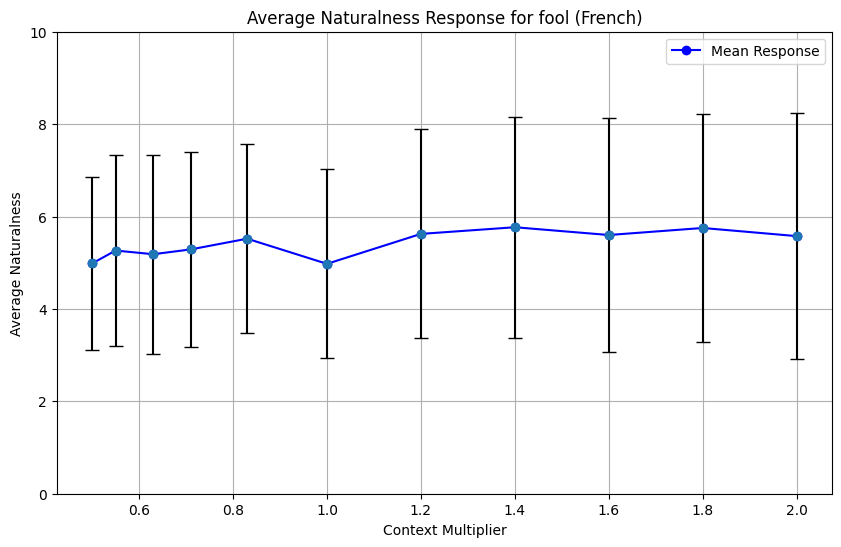

In [76]:
average_naturalness(french_fool_naturalness, 'fool', "French")

English data

In [41]:
# Split into separate DataFrames based on keywords
english_pill_df = english_data[english_data['filename'].str.contains('pill')]
english_pill_response = english_pill_df[english_pill_df['question'] == 'response']
english_pill_naturalness = english_pill_df[english_pill_df['question'] == 'slide']
english_peel_df = english_data[english_data['filename'].str.contains('peel')]
english_peel_response = english_peel_df[english_peel_df['question'] == 'response']
english_peel_naturalness = english_peel_df[english_peel_df['question'] == 'slide']
english_full_df = english_data[english_data['filename'].str.contains('full')]
english_full_response = english_full_df[english_full_df['question'] == 'response']
english_full_naturalness = english_full_df[english_full_df['question'] == 'slide']
english_fool_df = english_data[english_data['filename'].str.contains('fool')]
english_fool_response = english_fool_df[english_fool_df['question'] == 'response']
english_fool_naturalness = english_fool_df[english_fool_df['question'] == 'slide']

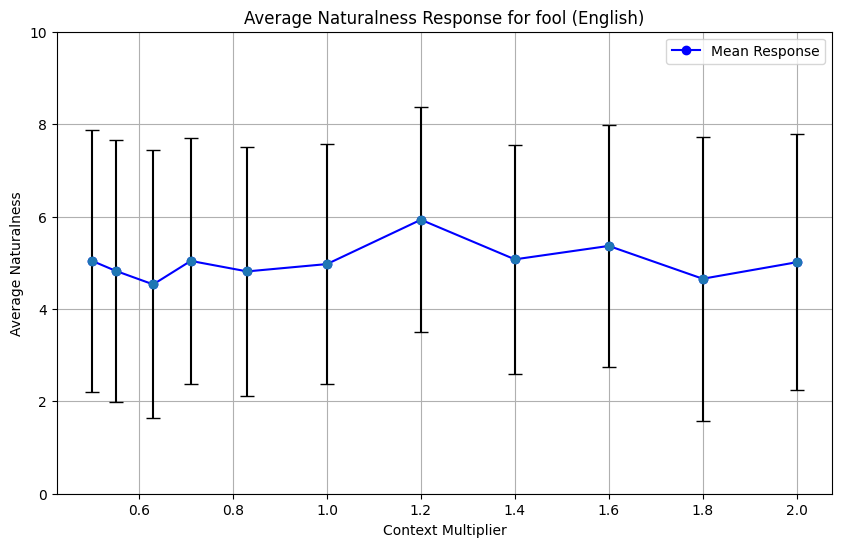

In [67]:
average_naturalness(english_fool_naturalness, 'fool', "English")

/home/paige/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:493: RuntimeWarning: overflow encountered in matmul
  cov_x = invR @ invR.T


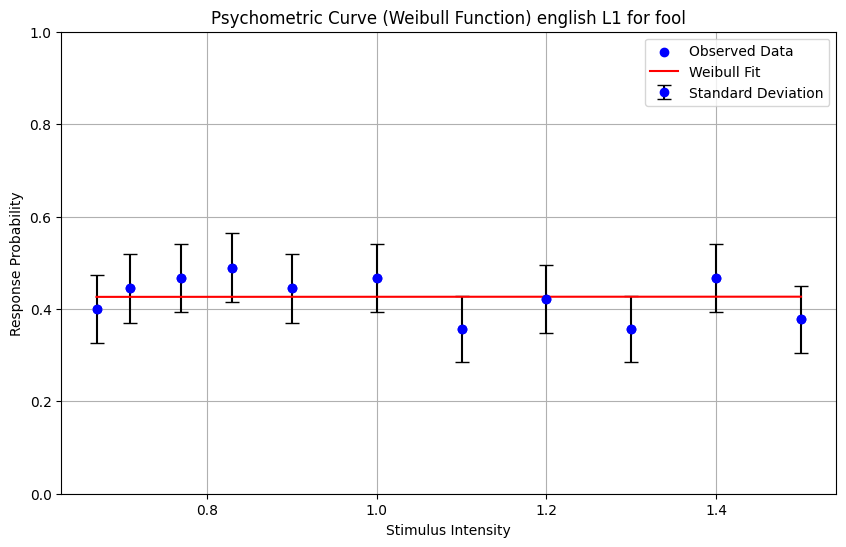

In [509]:
proportion_correct(english_fool_response, 'fool', "english")

/tmp/ipykernel_469854/898713881.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('viridis', len(unique_participants))
/home/paige/.local/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:493: RuntimeWarning: overflow encountered in matmul
  cov_x = invR @ invR.T


Paired t-test results: t=-0.46740, p=0.64652
Slope test results (greater than 0): t=0.37099, p=0.35776 (one-tailed)


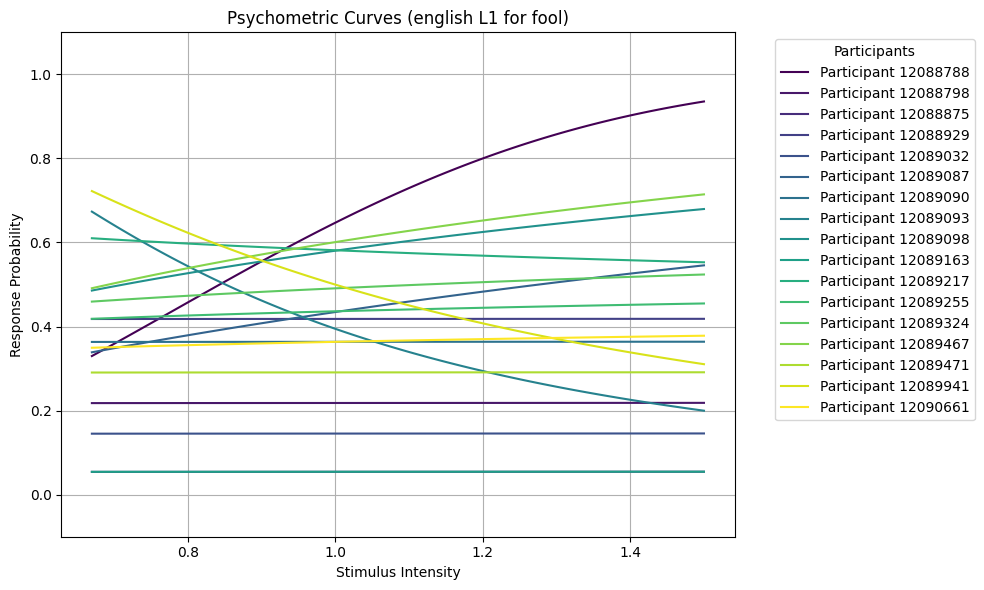

In [162]:
proportion_correct_participant(english_fool_response, 'fool', "english")

In [ ]:
proportion_correct_participant_2(english_fool_response, 'fool', "english")

In [59]:
# Main function
def proportion_correct_relative(df, word, L1):
    if word in ['pill', 'full']:
        correct = 0
    else:
        correct = 1

    # Aggregate data
    result = (
        df.groupby(['filename', 'Participant'])
        .agg(
            total_count=('filename', 'size'),  # Total responses
            count_response_0=('Response', lambda x: (x == correct).sum())  # Count correct responses
        )
        .assign(
            correct=lambda x: x['count_response_0'] / x['total_count']  # Proportion correct
        )
        .reset_index()
    )

    # Extract numeric part of filename for stimulus intensity
    result['numeric_part'] = result['filename'].str.split('-').str[0].astype(float)

        # Dynamically map numeric parts to the desired range
    unique_numeric_parts = sorted(result['numeric_part'].unique())
    target_range = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
    
    if len(unique_numeric_parts) != len(target_range):
        raise ValueError("The number of unique numeric parts does not match the target range length.")

    numeric_mapping = dict(zip(unique_numeric_parts, target_range))
    result['numeric_part'] = result['numeric_part'].map(numeric_mapping)

    # Calculate baseline correct proportions (numeric_part == 1.0)
    baseline_correct = (
        result[result['numeric_part'] == 0]
        .groupby('Participant')['correct']
        .mean()
        .rename('baseline_correct')
        .reset_index()
    )

    # Merge baseline correct proportions back into the result
    result = result.merge(baseline_correct, on='Participant')

    # Calculate relative proportions
    result['relative_correct'] = result['correct'] - result['baseline_correct']

    # Calculate mean and standard deviation of relative proportions for each numeric part
    relative_stats = (
        result.groupby('numeric_part')['relative_correct']
        .agg(mean='mean', std='std')  # Compute mean and std dev
        .reset_index()
        .rename(columns={'mean': 'relative_mean', 'std': 'relative_std'})
    )

    # Fit generalized logistic curve to the mean data
    try:
        popt, _ = curve_fit(
            generalized_logistic,
            relative_stats['numeric_part'],
            relative_stats['relative_mean'],
            p0=[1, 0, -0.5, 1],  # Initial guesses for L, x0, k, and v
            maxfev=10000000  # Increase max evaluations if needed
        )
    except RuntimeError:
        print("Logistic fit failed; check data.")
        popt = None

    # Generate smooth x values for curve fitting
    #x_fit = np.logspace(
    #    np.log10(relative_stats['numeric_part'].min()), 
    #    np.log10(relative_stats['numeric_part'].max()), 
    #    100
    #)
    x_fit = np.linspace(
        relative_stats['numeric_part'].min(), 
        relative_stats['numeric_part'].max(), 
        100
    )
    y_fit = generalized_logistic(x_fit, *popt) if popt is not None else None

    # Plot
    plt.figure(figsize=(10, 6))

    # Plot observed data with error bars
    plt.errorbar(
        relative_stats['numeric_part'],
        relative_stats['relative_mean'],
        yerr=relative_stats['relative_std'],
        fmt='o',
        color='blue',
        ecolor='black',
        capsize=5,
        label='Relative Data with Error Bars'
    )

    # Plot logistic curve if fit succeeded
    if y_fit is not None:
        plt.plot(x_fit, y_fit, color='red', label='Generalized Logistic Fit')

    # Set x-axis to logarithmic
    #plt.xscale('log')

    # Optionally reverse the x-axis
    #plt.gca().invert_xaxis()

    # Customize the plot
    plt.axhline(0, color='gray', linestyle='--', label='Baseline (0)')
    plt.ylim(-0.8, 0.8)
    plt.xlabel('Stimulus Intensity')
    plt.ylabel('Relative Proportion Correct')
    plt.title(f'Relative Proportions ({L1} L1 for {word})')
    plt.legend()
    plt.grid()
    plt.show()

In [61]:
def generalized_logistic(x, L, x0, k, v):
    """Generalized Logistic function: symmetric sigmoid-like curve."""
    return L / (1 + np.exp(-k * (x - x0)))**(1 / v) - L / 2

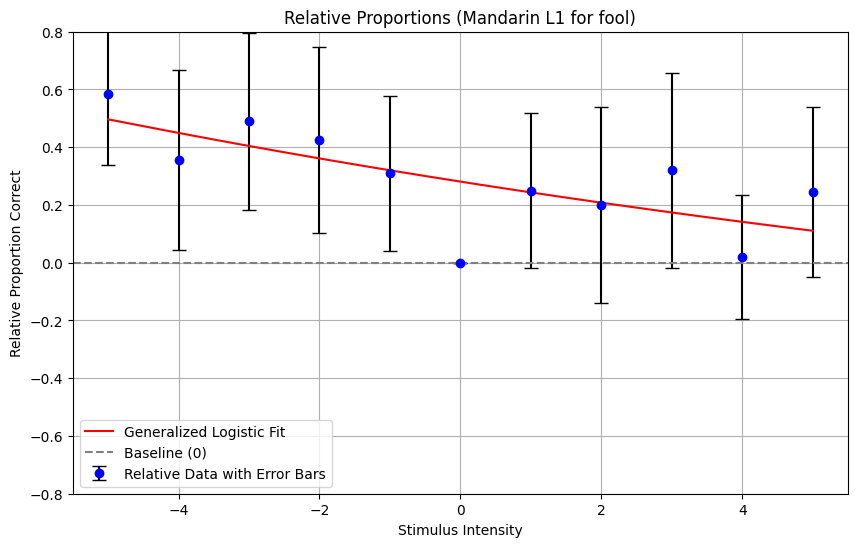

In [65]:
proportion_correct_relative(mandarin_fool_response, 'fool', "Mandarin")

In [66]:
from scipy.stats import ttest_1samp

def proportion_correct_ttest(df, word, L1):
    if word in ['pill', 'full']:
        correct = 0
    else:
        correct = 1

    # Aggregate data
    result = (
        df.groupby(['filename', 'Participant'])
        .agg(
            total_count=('filename', 'size'),  # Total responses
            count_response_0=('Response', lambda x: (x == correct).sum())  # Count correct responses
        )
        .assign(
            correct=lambda x: x['count_response_0'] / x['total_count']  # Proportion correct
        )
        .reset_index()
    )

    # Extract numeric part of filename for stimulus intensity
    result['numeric_part'] = result['filename'].str.split('-').str[0].astype(float)

        # Dynamically map numeric parts to the desired range
    unique_numeric_parts = sorted(result['numeric_part'].unique())
    target_range = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
    
    if len(unique_numeric_parts) != len(target_range):
        raise ValueError("The number of unique numeric parts does not match the target range length.")

    numeric_mapping = dict(zip(unique_numeric_parts, target_range))
    result['numeric_part'] = result['numeric_part'].map(numeric_mapping)

    # Calculate baseline correct proportions (numeric_part == 1.0)
    baseline_correct = (
        result[result['numeric_part'] == 0]
        .groupby('Participant')['correct']
        .mean()
        .rename('baseline_correct')
        .reset_index()
    )

    # Merge baseline correct proportions back into the result
    result = result.merge(baseline_correct, on='Participant')

    # Calculate relative proportions
    result['relative_correct'] = result['correct'] - result['baseline_correct']

    # Calculate mean and standard deviation of relative proportions for each numeric part
    relative_stats = (
        result.groupby('numeric_part')['relative_correct']
        .agg(mean='mean', std='std')  # Compute mean and std dev
        .reset_index()
        .rename(columns={'mean': 'relative_mean', 'std': 'relative_std'})
    )

    # Fit generalized logistic curve to the mean data
    try:
        popt, _ = curve_fit(
            generalized_logistic,
            relative_stats['numeric_part'],
            relative_stats['relative_mean'],
            p0=[1, 0, -0.5, 1],  # Initial guesses for L, x0, k, and v
            maxfev=10000000  # Increase max evaluations if needed
        )
    except RuntimeError:
        print("Logistic fit failed; check data.")
        popt = None

    # Generate smooth x values for curve fitting
    #x_fit = np.logspace(
    #    np.log10(relative_stats['numeric_part'].min()), 
    #    np.log10(relative_stats['numeric_part'].max()), 
    #    100
    #)
    x_fit = np.linspace(
        relative_stats['numeric_part'].min(), 
        relative_stats['numeric_part'].max(), 
        100
    )
    y_fit = generalized_logistic(x_fit, *popt) if popt is not None else None

    # Plot
    plt.figure(figsize=(10, 6))

    # Plot observed data with error bars
    plt.errorbar(
        relative_stats['numeric_part'],
        relative_stats['relative_mean'],
        yerr=relative_stats['relative_std'],
        fmt='o',
        color='blue',
        ecolor='black',
        capsize=5,
        label='Relative Data with Error Bars'
    )

    # Plot logistic curve if fit succeeded
    if y_fit is not None:
        plt.plot(x_fit, y_fit, color='red', label='Generalized Logistic Fit')

    # Set x-axis to logarithmic
    #plt.xscale('log')

    # Optionally reverse the x-axis
    #plt.gca().invert_xaxis()

    # Customize the plot
    plt.axhline(0, color='gray', linestyle='--', label='Baseline (0)')
    plt.ylim(-0.8, 0.8)
    plt.xlabel('Stimulus Intensity')
    plt.ylabel('Relative Proportion Correct')
    plt.title(f'Relative Proportions ({L1} L1 for {word})')
    plt.legend()
    plt.grid()
    plt.show()

    # Group by numeric part to calculate stats and perform t-test
    ttest_results = []
    for numeric_part, group in result.groupby('numeric_part'):
        t_stat, p_value = ttest_1samp(group['relative_correct'], 0)
        ttest_results.append({
            'numeric_part': numeric_part,
            't_stat': t_stat,
            'p_value': p_value,
            'mean_relative': group['relative_correct'].mean(),
            'std_relative': group['relative_correct'].std()
        })

    ttest_results_df = pd.DataFrame(ttest_results)

    # Plot the results
    plt.figure(figsize=(10, 6))

    # Plot observed data with error bars
    plt.errorbar(
        ttest_results_df['numeric_part'],
        ttest_results_df['mean_relative'],
        yerr=ttest_results_df['std_relative'],
        fmt='o',
        color='blue',
        ecolor='black',
        capsize=5,
        label='Relative Data with Error Bars'
    )

    # Plot a baseline at y=0
    plt.axhline(0, color='gray', linestyle='--', label='Baseline (0)')

    # Annotate p-values on the plot
    for i, row in ttest_results_df.iterrows():
        plt.text(row['numeric_part'], row['mean_relative'], f"p={row['p_value']:.3f}", fontsize=8, ha='center')

    # Customize the plot
    plt.ylim(-0.75, 0.75)
    plt.xlabel('Stimulus Intensity')
    plt.ylabel('Relative Proportion Correct')
    plt.title(f'Relative Proportions with T-Tests ({L1} L1 for {word})')
    plt.legend()
    plt.grid()
    plt.show()

    # Print T-Test results
    print(ttest_results_df)

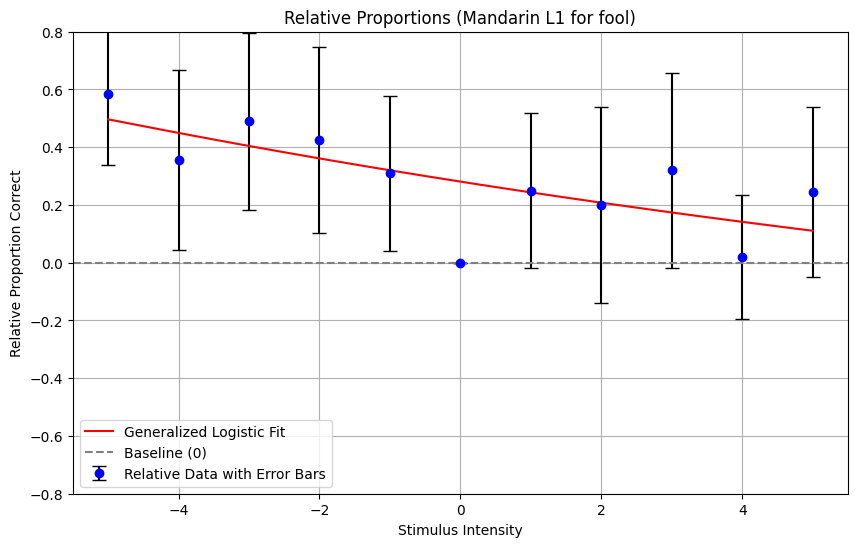

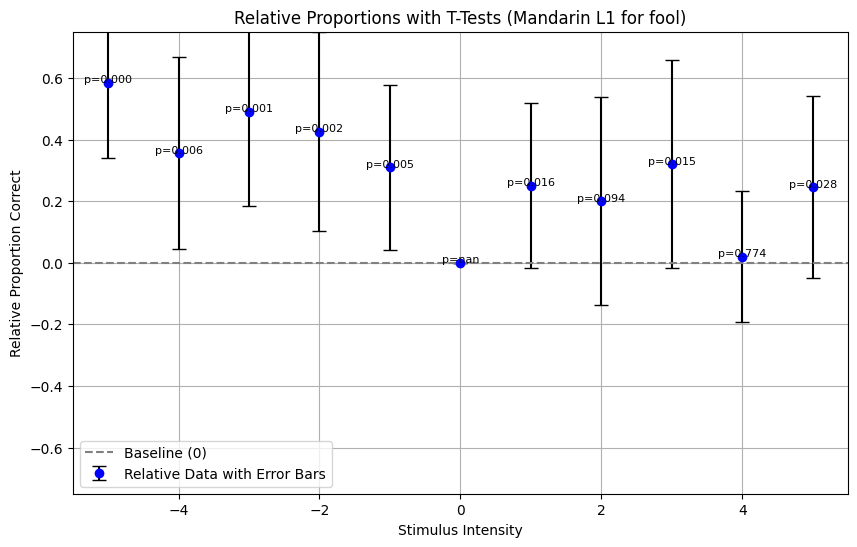

    numeric_part    t_stat   p_value  mean_relative  std_relative
0             -5  7.515870  0.000036          0.585      0.246137
1             -4  3.606028  0.005694          0.355      0.311314
2             -3  5.045027  0.000695          0.490      0.307137
3             -2  4.166911  0.002423          0.425      0.322533
4             -1  3.650569  0.005313          0.310      0.268535
5              0       NaN       NaN          0.000      0.000000
6              1  2.953122  0.016139          0.250      0.267706
7              2  1.869531  0.094369          0.200      0.338296
8              3  2.997075  0.015027          0.320      0.337639
9              4  0.295958  0.773977          0.020      0.213698
10             5  2.619576  0.027830          0.245      0.295757


In [70]:
proportion_correct_ttest(mandarin_fool_response, 'fool', "Mandarin")